边缘检测

sobel算子:一阶导数

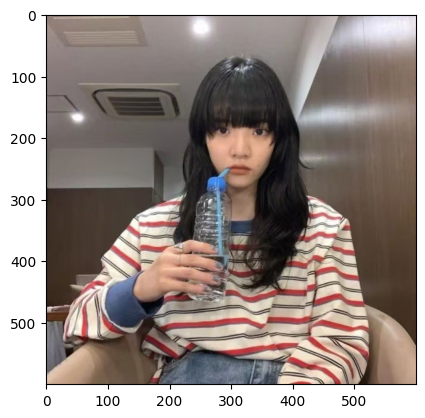

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img=cv.imread('D:\image\\aimyon.jpg')
plt.imshow(img[:,:,::-1])

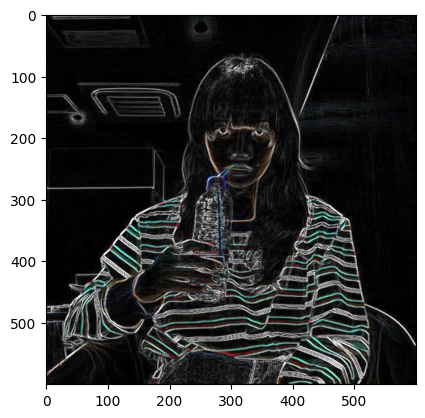

In [26]:
xsobel=cv.Sobel(img,cv.CV_16S,1,0)
ysobel=cv.Sobel(img,cv.CV_16S,0,1)
absx=cv.convertScaleAbs(xsobel)
absy=cv.convertScaleAbs(ysobel)
result=cv.addWeighted(absx,0.5,absy,0.5,0)
plt.imshow(result[:,:,::-1])

Sobel(src, ddepth, dx, dy, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

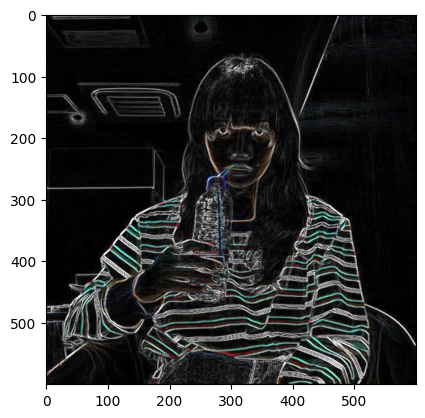

In [27]:
xsobel1=cv.Sobel(img,cv.CV_16S,1,0,-1)
ysobel1=cv.Sobel(img,cv.CV_16S,0,1,-1)
absx1=cv.convertScaleAbs(xsobel1)
absy1=cv.convertScaleAbs(ysobel1)
result1=cv.addWeighted(absx1,0.5,absy1,0.5,0)
plt.imshow(result1[:,:,::-1])

当ksize=-1时，就使用了scharr算子，相较起来scharr算子对微小边缘检测更加精确，精度更高。除此之外还可以用Scharr函数，参数同Sobel函数，实现scharr核

laplacian算子：二阶导数

Laplacian(src,ddepth,dst,ksize,scale,delta,borderType)

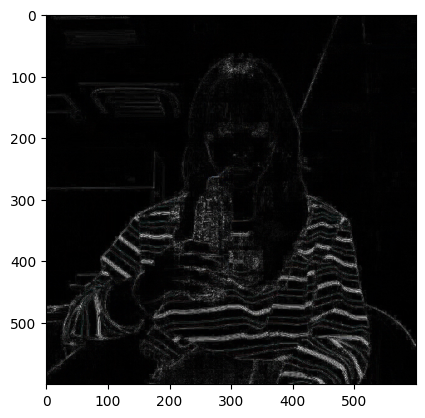

In [28]:
lap=cv.Laplacian(img,cv.CV_16S)
lap_abs=cv.convertScaleAbs(lap)
plt.imshow(lap_abs[:,:,::-1])

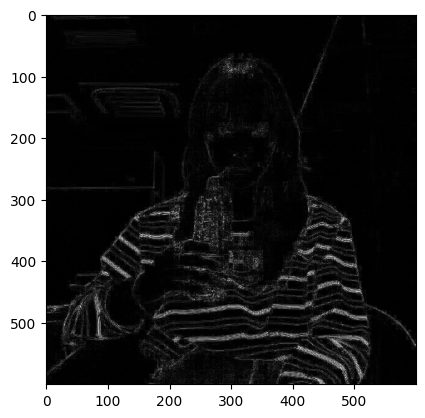

In [29]:
img_gray=cv.imread('D:\image\\aimyon.jpg',0)
lap1=cv.Laplacian(img_gray,cv.CV_16S)
lap_abs1=cv.convertScaleAbs(lap1)
plt.imshow(lap_abs1,'gray')


Laplacian 算子是一种二阶导数算子，核心功能是检测图像中灰度值的突变（边缘），其计算基于像素的灰度值（亮度信息），与颜色通道（如 RGB 的红、绿、蓝分量）无关。往往会使图像的颜色细节丢失，为了更高效地检测边缘（同时避免颜色通道的冗余计算），通常会先将彩色图像转为单通道灰度图，再应用 Laplacian 算子

所以从上面的说明中，可以知道在边缘检测中，目的就是得到灰度边缘图，所以对于上面sobel算子出现彩色条纹边缘的情况就是不应当的现象。原因是我们直接对彩色图像的三个通道进行sobel，三个通道得出来的梯度响应差异,被误解为是颜色响应

<span style="color:blue;">所以最正确的做法是将图像以灰度的方式进行读取，再进行后面的边缘检测操作</span>

我们重写上面的sobel算子：

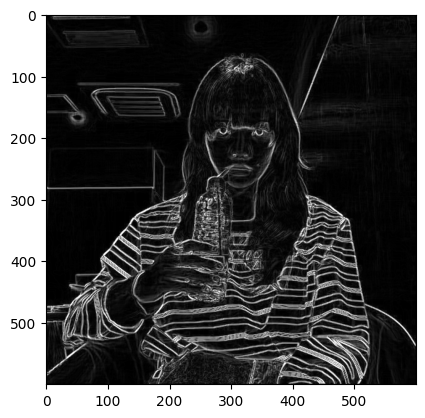

In [30]:
txsobel=cv.Sobel(img_gray,cv.CV_16S,1,0)
tysobel=cv.Sobel(img_gray,cv.CV_16S,0,1)
txabs=cv.convertScaleAbs(txsobel)
tyabs=cv.convertScaleAbs(tysobel)
result_abs=cv.addWeighted(txabs,0.5,tyabs,0.5,0)
plt.imshow(result_abs,'gray')

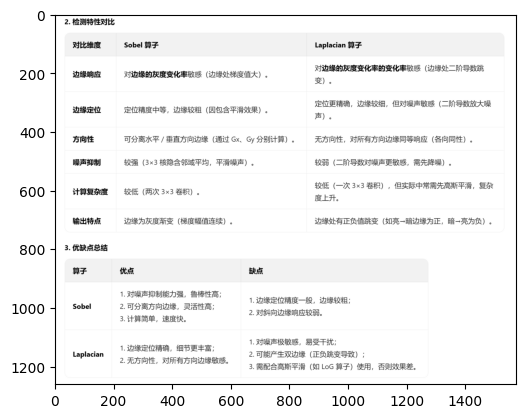

In [31]:
compare=cv.imread('D:\Code\Opencv\edgeDetection\compare.png')
apply=cv.imread('D:\Code\Opencv\edgeDetection\\apply.png')
plt.imshow(compare[:,:,::-1])


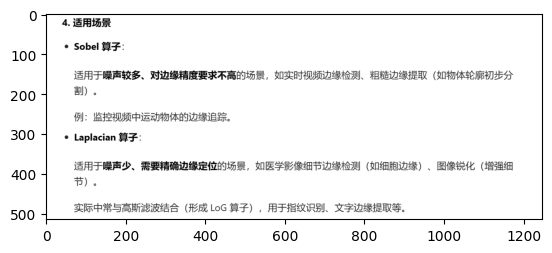

In [32]:
plt.imshow(apply[:,:,::-1])

Canny检测：Canny 边缘检测是一种多阶段的精确边缘检测算法，流程可概括为以下 4 步：
高斯滤波降噪用高斯核卷积图像，平滑噪声（边缘检测对噪声敏感，先降噪可减少误检）。
计算梯度幅值和方向用 Sobel 算子计算水平（Gx）和垂直（Gy）方向梯度，得到梯度幅值（√(Gx²+Gy²)）和方向（arctan (Gy/Gx)，取 0°、45°、90°、135° 四舍五入）。
非极大值抑制（NMS）遍历梯度图像，仅保留梯度方向上局部幅值最大的像素（剔除边缘周围的非边缘点，使边缘变细）。
双阈值筛选边缘设定高、低两个阈值：
高于高阈值的像素为 “强边缘”，直接保留；
低于低阈值的像素为 “非边缘”，直接剔除；
介于两者之间的为 “弱边缘”，若与强边缘连通则保留，否则剔除（最终得到连续、完整的边缘）。
通过这四步，Canny 能检测出清晰、连续的边缘，且抗噪声能力强，是目前应用最广泛的边缘检测算法之一。

Canny(image,threshold1,threshold2)#第一个是低阈值，第二个是高阈值，image是灰度图

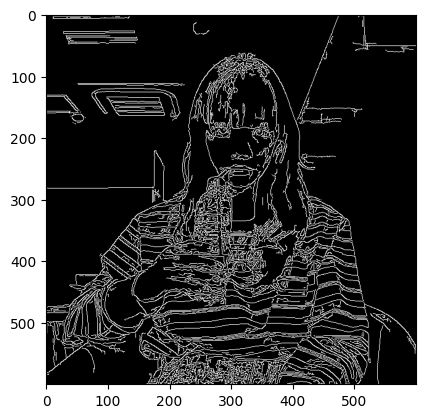

In [33]:
canny=cv.Canny(img_gray,10,100)
plt.imshow(canny,'gray')

课外拓展：如何确定高低阈值